<a href="https://colab.research.google.com/github/Ravikumar10593-hub/15daybootcamp/blob/main/Day_13_ML(i)(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#import the dataset

data=pd.read_csv('/content/datasets_586_1114_zoo.csv')

In [3]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
data['class_type'].unique() #target variable

array([1, 4, 2, 7, 6, 5, 3])

In [7]:
data['animal_name'].nunique()

100

In [8]:
#NO need for the annimal name since we have 100 of diff annimal so we can not use at anyway

data.drop('animal_name',axis=1,inplace=True)

In [9]:
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   hair        101 non-null    int64
 1   feathers    101 non-null    int64
 2   eggs        101 non-null    int64
 3   milk        101 non-null    int64
 4   airborne    101 non-null    int64
 5   aquatic     101 non-null    int64
 6   predator    101 non-null    int64
 7   toothed     101 non-null    int64
 8   backbone    101 non-null    int64
 9   breathes    101 non-null    int64
 10  venomous    101 non-null    int64
 11  fins        101 non-null    int64
 12  legs        101 non-null    int64
 13  tail        101 non-null    int64
 14  domestic    101 non-null    int64
 15  catsize     101 non-null    int64
 16  class_type  101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [11]:
data.isnull().sum()

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

In [12]:
data['class_type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


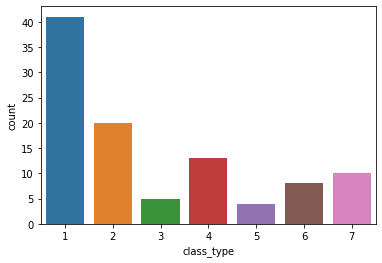

In [13]:
#countplot on class type

sns.countplot(data['class_type'])

In [14]:
class_1=data[data['class_type']==1]

In [15]:
#x and y
x=data.drop('class_type',axis=1)
y=data['class_type']

In [16]:
#splitting the data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
#svm

from sklearn.svm import SVC

model=SVC()

model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
y_pred=model.predict(x_test)

In [19]:
#accuracy score

from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

1.0

# we got 100% accuracy

In [20]:
#Implement K_fold validation

from sklearn.model_selection import cross_val_score

svc_model=SVC()


In [22]:
model_cv=cross_val_score(svc_model,x,y,cv=4)
model_cv

array([0.92307692, 0.96      , 0.92      , 0.88      ])

In [23]:
model_cv.mean()

0.9207692307692308

In [24]:
#Changing the C parameter

svc_c = SVC(C=10)
model_cv=cross_val_score(svc_c,x,y,cv=4)

In [25]:
model_cv

array([0.96153846, 1.        , 0.92      , 0.96      ])

In [26]:
model_cv.mean()

0.9603846153846154

In [27]:
#Now give some kernal value to SVM.
#Default kernal will be linear.
#To find we have linear or non-linear data

svc_c= SVC (C=10,kernel='linear')

model_cv= cross_val_score(svc_c,x,y,cv=4)

model_cv.mean()

0.9303846153846154